## First, we import the libraries and load the dataset.

In [1]:
import pandas as pd                                    #Data Processing
import numpy as np                                     #Linear Algebra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_theme(style = "darkgrid")

## Now, we read the data.

In [2]:
data = pd.read_csv("loan_default_prediction_project.csv")
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


## Understanding the Dataset

In [3]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 1000
Columns: 12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


## Analyzing Numerical Columns

In [5]:
data.describe()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,60705.291386,571.094000,0.485502,25239.656186,27636.369345,11.538267,42.221000
std,13.497852,24594.030383,163.395983,0.296466,14202.689890,12925.200961,4.883342,17.116867
min,18.000000,20010.775440,250.000000,0.000628,80.059377,5060.998602,3.003148,12.000000
25%,29.000000,40820.367273,429.000000,0.220606,13597.494593,16756.405848,7.483547,27.000000
50%,42.000000,60547.119929,567.000000,0.483633,25439.429898,27938.066858,11.537942,42.000000
75%,52.000000,80338.552791,720.250000,0.735476,37305.466739,39151.564233,15.499129,57.000000
max,64.000000,150000.000000,849.000000,0.999849,49987.578171,49986.843702,19.991438,71.000000


In [6]:
data.isnull().sum()

Age                        0
Gender                   208
Income                     0
Employment_Status         94
Location                   0
Credit_Score               0
Debt_to_Income_Ratio       0
Existing_Loan_Balance      0
Loan_Status                0
Loan_Amount                0
Interest_Rate              0
Loan_Duration_Months       0
dtype: int64

In [7]:
##Replace the missing values for categorical columns with mode

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Employment_Status'] = data['Employment_Status'].fillna(data['Employment_Status'].mode()[0])
data.isnull().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

Mode is the most frequently occurring value. It is used in the case of categorical features. You can use the ‘fillna’ method for imputing the categorical columns ‘Gender,’ and ‘Employment_Status.’

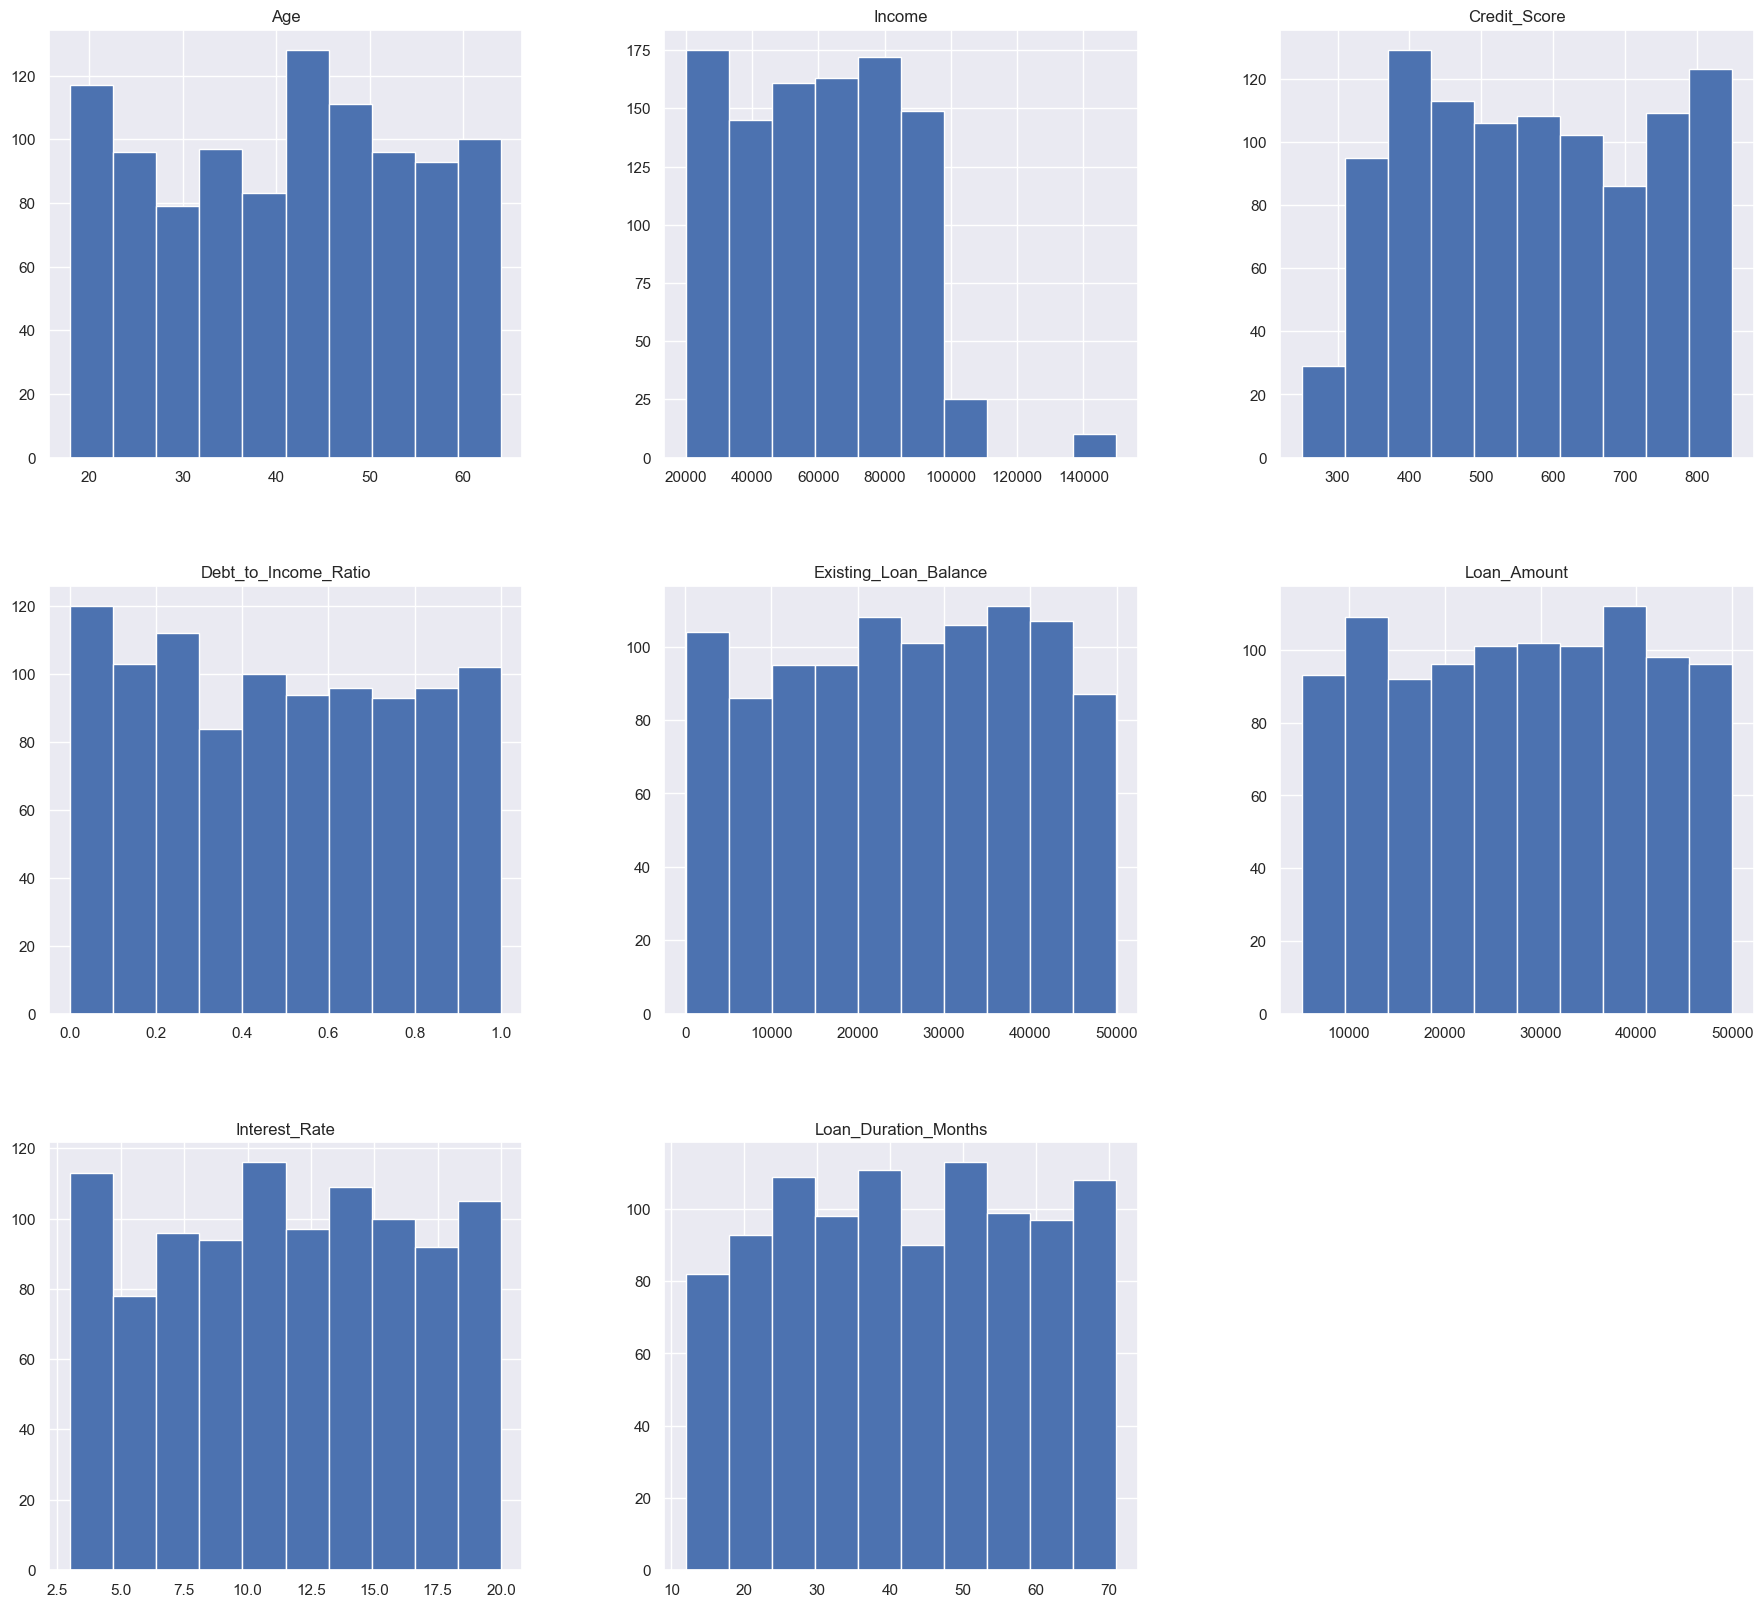

In [8]:
#Now, we check the data distribution

data.hist( figsize = (22, 20) )
plt.show()

In [37]:
#Now, we check the count of the target variable.

data["Loan_Amount"].value_counts()

13068.330587    1
22935.468272    1
35896.392595    1
21490.561434    1
39010.605930    1
               ..
28016.647105    1
33981.189670    1
9600.087701     1
43003.468909    1
49850.267385    1
Name: Loan_Amount, Length: 1000, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8112\2951778133.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


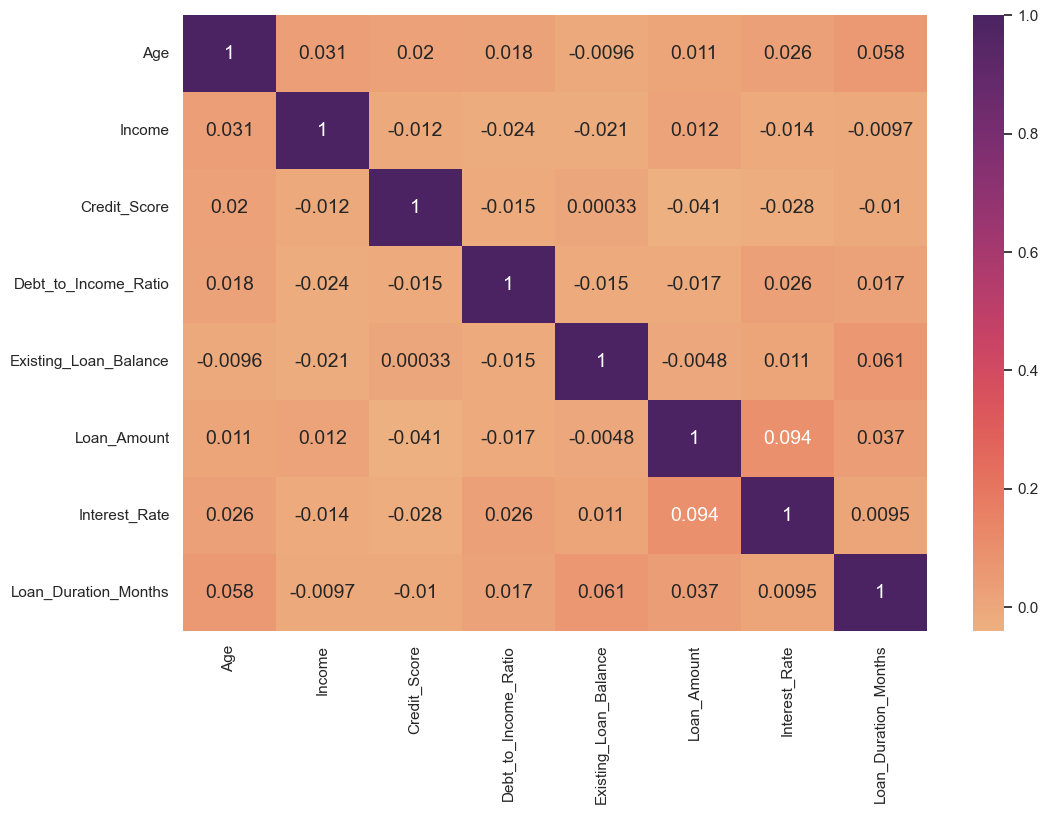

In [10]:
#Now, we plot the correlation plot.

fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

## Analyzing Categorical Features

In [11]:
#Now, we proceed with the analysis of categorical features.

def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

Non-Default    805
Default        195
Name: Loan_Status, dtype: int64


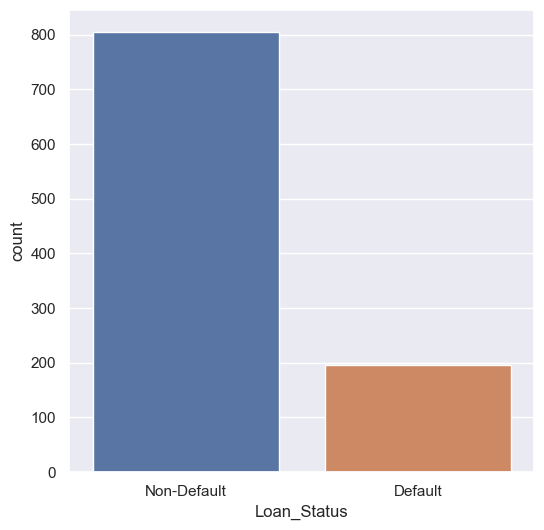

In [12]:
categorical_valcount_hist("Loan_Status")

Employed      690
Unemployed    310
Name: Employment_Status, dtype: int64


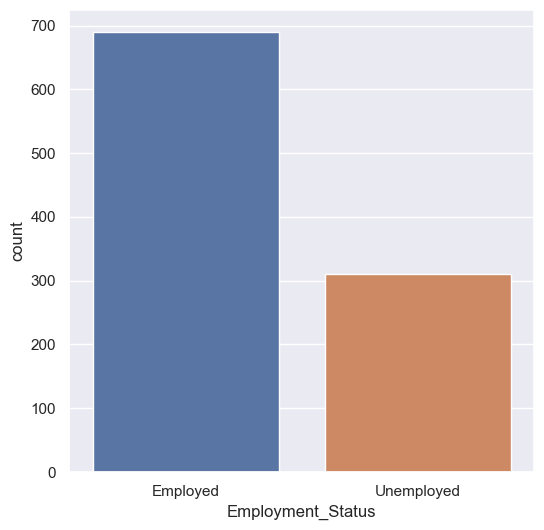

In [13]:
categorical_valcount_hist("Employment_Status")

In [14]:
#Now, let us check the count of locations.

print( "Total categories in Location:", len( data["Location"].unique() ) )
print()
print( data["Location"].value_counts() )

Total categories in Location: 3

Rural       348
Suburban    344
Urban       308
Name: Location, dtype: int64


## Data Analysis

<Axes: xlabel='Loan_Status', ylabel='Income'>

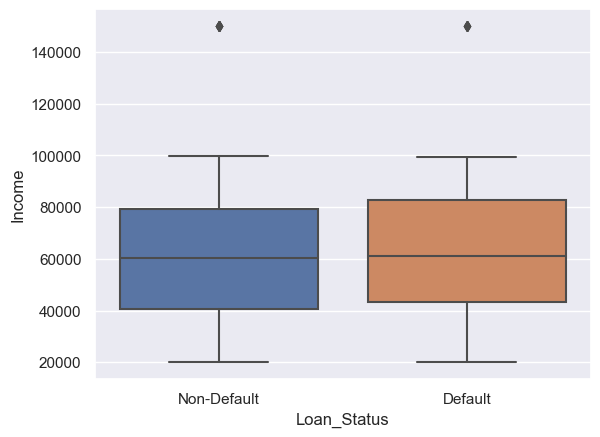

In [15]:
#Now, we start with understanding the relationship between the different data features.

sns.boxplot(x ="Loan_Status",y="Income" ,data = data)

<Axes: xlabel='Loan_Status', ylabel='Age'>

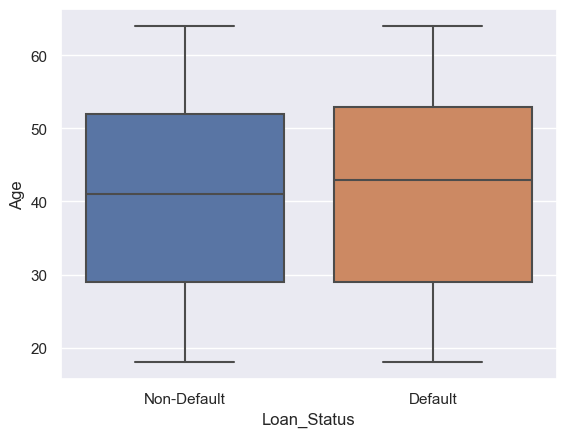

In [16]:
sns.boxplot(x ="Loan_Status",y="Age" ,data = data)

<Axes: xlabel='Employment_Status', ylabel='Credit_Score'>

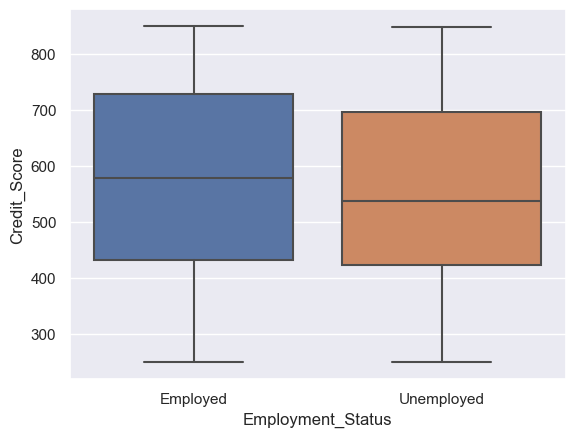

In [17]:
sns.boxplot(x ="Employment_Status",y="Credit_Score" ,data = data)

## Splitting the data into train and test splits

In [23]:
x = data.drop("Loan_Amount", axis=1)
y = data["Loan_Amount"]

In [24]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=42)

## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [31]:
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

In [36]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

ValueError: Unknown label type: 'continuous'

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------


NameError: name 'y_pred' is not defined